# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
file = 'E:/Sentimental Analysis/data/Sentiment140.csv'
df = pd.read_csv(file,encoding='latin-1')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Data cleaning

In [3]:
headerList = ['target', 'id', 'date', 'flag', 'user', 'text'] 
df.to_csv("Sentiment140.csv", header=headerList, index=False) 

In [4]:
df = pd.read_csv("Sentiment140.csv")
df

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
len(df[df['flag'] == 'NO_QUERY'])

1599999

In [6]:
df = df.drop(columns = ['id','date', 'flag', 'user'], axis = 0)
df

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
dfx = df['target']
dfy = df['text']

In [8]:
df = pd.concat([dfy, dfx], axis=1)
df

,text,target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,4
1599995,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,Happy 38th Birthday to my boo of alll time!!! ...,4


In [9]:
df.duplicated().sum()

16309

In [10]:
df = df.drop_duplicates()
df

,text,target
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,4
1599995,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,Happy 38th Birthday to my boo of alll time!!! ...,4


In [11]:
#target: the polarity of the tweet (-1 = negative, 0 = neutral, 1 = positive)

df['target'] = df['target'].replace({0: -1, 2: 0, 4: 1})
negative = len(df[df['target'] == -1])
neutral = len(df[df['target'] == 0])
positive = len(df[df['target'] == 1])

print("Negative ", negative , "Neutral ", neutral, "Positive ", positive)

Negative  790184 Neutral  0 Positive  793506


<ipython-input-11-0680d1d29481>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({0: -1, 2: 0, 4: 1})


# Data Preprocessing

In [12]:
def remove_links(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)
def strip_html(text):
    return re.sub(r'<.*?>', '', text)
def special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
def tokenizewords(text):
    return ' '.join(word_tokenize(text))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in sw_list])
ps = PorterStemmer()
def stemwords(text):
    return ' '.join([ps.stem(word) for word in text.split()])

In [13]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_links)                 
df['text'] = df['text'].apply(strip_html)
df['text'] = df['text'].apply(special_chars)
df['text'] = df['text'].apply(tokenizewords) 
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(stemwords)

<ipython-input-13-a97bfb7b8c5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()
<ipython-input-13-a97bfb7b8c5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_links)
<ipython-input-13-a97bfb7b8c5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

# Save Dataset

In [14]:
df.to_csv('E:/Sentimental Analysis/data/new_Sentiment140.csv', index=False)


# Load Dataset

In [15]:
file = 'E:/Sentimental Analysis/data2/Twitter_Data.csv'
df = pd.read_csv(file)
df = df.dropna(subset=['category'])
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [16]:
df['category'] = df['category'].astype(int)

In [17]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1
162976,dear rss terrorist payal gawar what about modi...,-1
162977,did you cover her interaction forum where she ...,0
162978,there big project came into india modi dream p...,0


In [18]:
df = df.rename(columns={'clean_text': 'text', 'category': 'target'})

In [19]:
negative = len(df[df['target'] == -1])
neutral = len(df[df['target'] == 0])
positive = len(df[df['target'] == 1])

print("Negative ", negative , "Neutral ", neutral, "Positive ", positive)

Negative  35510 Neutral  55213 Positive  72250


In [20]:
df = df.dropna()
df.isnull().sum()


text      0
target    0
dtype: int64

# TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)

In [22]:
X = tfidf.fit_transform(df['text'])
X.shape

(162969, 500)

In [23]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
total_words = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(df['text'])

In [24]:
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = to_categorical(df['target'], num_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
print(max_sequence_length)

52


# LSTM Model Building

In [25]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.3, callbacks=[early_stopping])


Epoch 1/20
1248/1248 [==============================] - 109s 86ms/step - loss: 0.3485 - accuracy: 0.8717 - val_loss: 0.1653 - val_accuracy: 0.9509
Epoch 2/20
1248/1248 [==============================] - 108s 86ms/step - loss: 0.1088 - accuracy: 0.9671 - val_loss: 0.1326 - val_accuracy: 0.9594
Epoch 3/20
1248/1248 [==============================] - 109s 88ms/step - loss: 0.0578 - accuracy: 0.9816 - val_loss: 0.1322 - val_accuracy: 0.9604
Epoch 4/20
1248/1248 [==============================] - 109s 87ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.1527 - val_accuracy: 0.9619
Epoch 5/20
1248/1248 [==============================] - 107s 86ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.1618 - val_accuracy: 0.9604
Epoch 6/20
1248/1248 [==============================] - 108s 87ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.2087 - val_accuracy: 0.9558


# Visualizing Model Outputs

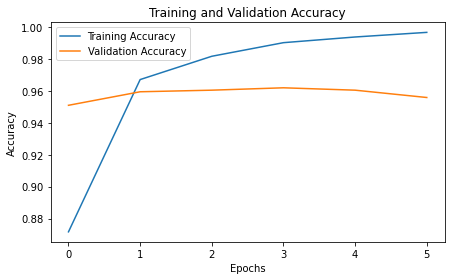

In [29]:
def plot_accuracy(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_accuracy(history)

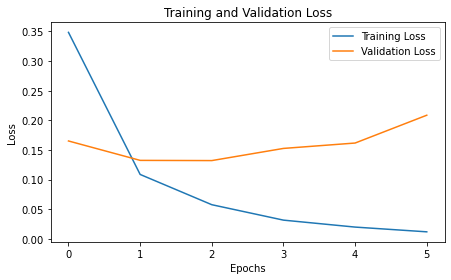

In [30]:
def plot_loss(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_loss(history)

# Prediciton

In [31]:
def preprocess_input(user_input, tokenizer, max_sequence_length):
    input_sequence = tokenizer.texts_to_sequences([user_input])
    padded_input = pad_sequences(input_sequence, maxlen=max_sequence_length)
    return padded_input

In [55]:
user_input = input()
preprocessed_input = preprocess_input(user_input, tokenizer, max_sequence_length)
predictions = model.predict(preprocessed_input)
sentiment_mapping = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}

predicted_sentiment_label = sentiment_mapping[predictions.argmax()]

print(f"User input: {user_input}")
print(f"Predicted sentiment: {predicted_sentiment_label}")

I have no idea what to ask? LOL
1/1 [==============================] - 0s 16ms/step
User input: I have no idea what to ask? LOL
Predicted sentiment: Positive


# Model save

In [56]:
import pickle

# Save the model
model.save('E:/Sentimental Analysis/sentiment_model.h5')

C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
with open('E:/Sentimental Analysis/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)